In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from delai.ml_logic.preprocessing import preprocess_X, preprocess_y
from delai.data.local_disk import get_pandas_chunk
import os

In [26]:
get_pandas_chunk('initial_X_train')

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/initial_X_train.csv'

In [2]:
df_X = pd.read_csv('../raw_data/initial_X_train.csv')
df_y = pd.read_csv('../raw_data/initial_y_train.csv')

X = preprocess_X(df_X)
y = preprocess_y(df_y)

✅ preprocess_X() done
✅ STANDARD preprocess_y() done


In [42]:
print(np.unique(y, return_counts=True)[1] *100 / len(y))
print(np.unique(y))

[0 1 2 3]


## Baseline

Assume that the model just returns OnTime_Early for every prediction, what is the F1?

I.e This now becomes a binary score?

In [56]:
value_counts = np.unique(y, return_counts=True)[1]
on_time_early_true = value_counts[2]
tp = on_time_early_true
fn = 0 # we aren't predicting anything other than positives
fp = len(y)- on_time_early_true
tn = 0 # we don't have any true negatives as no negatives are predicted

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('accuracy:', accuracy)

recall = tp / (tp + fn)
print('recall:',recall)

precision = tp / (tp + fp)
print('precision:', precision)

f1 = 2 * (precision * recall) / (precision + recall)
print('f1 score:', f1)

accuracy: 0.6529
recall: 1.0
precision: 0.6529
f1 score: 0.7900054449754976


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss='log_loss')
sgd_model.fit(X_train,y_train)
cross_val_score(sgd_model, X_train, y_train, cv=5, scoring='accuracy')


array([0.21142857, 0.65642857, 0.48928571, 0.65642857, 0.65428571])

In [59]:
y_pred =sgd_model.predict(X_test)
pd.DataFrame(y_pred).value_counts()/len(y_pred)

2    0.998333
3    0.001667
dtype: float64

# Altering the inputs

The idea here is to change the distribution of data so that a lower proportion are on_time and see the impact on the model 

In [74]:
new_df_y = pd.DataFrame(y)
new_y_2 = new_df_y.loc[new_df_y[0] == 2].sample(2000)
new_y_not2 = new_df_y.loc[new_df_y[0] != 2]
new_y = new_y_2.append(new_y_not2)
new_y.value_counts()/len(new_y)





/var/folders/bv/l32lnnz566v9xm218mhmqy5m0000gn/T/ipykernel_15645/1292450808.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_y = new_y_2.append(new_y_not2)


3    0.388594
2    0.365564
0    0.194114
1    0.051727
dtype: float64

In [75]:
new_X = X.iloc[new_y.index]
new_X

,0,1,2,3,4,5,6,7,8,9,...,689,690,691,692,693,694,695,696,697,698
1457,0.078372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.101168,-0.994869,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17,0.002618,0.999997,0.002618,0.999997
9281,0.078979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.937752,0.347305,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17,0.002618,0.999997,0.002618,0.999997
6351,0.151681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.101168,-0.994869,-5.000000e-01,-8.660254e-01,-1.000000e+00,-1.836970e-16,0.007854,0.999969,0.007854,0.999969
5771,0.327055,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.394356,0.918958,-2.449294e-16,1.000000e+00,-2.449294e-16,1.000000e+00,0.010472,0.999945,0.010472,0.999945
13,0.426083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.724793,0.688967,5.000000e-01,8.660254e-01,1.000000e+00,6.123234e-17,0.002618,0.999997,0.002618,0.999997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,0.034022,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.485302,-0.874347,-5.000000e-01,-8.660254e-01,-1.000000e+00,-1.836970e-16,0.007854,0.999969,0.007854,0.999969
9985,0.222357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.485302,-0.874347,5.000000e-01,8.660254e-01,1.000000e+00,6.123234e-17,0.002618,0.999997,0.002618,0.999997
9992,0.121709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.299363,-0.954139,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00,0.005236,0.999986,0.005236,0.999986
9993,0.036047,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.968077,-0.250653,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00,0.005236,0.999986,0.005236,0.999986


In [76]:
sgd_model_2 = SGDClassifier(loss='log_loss')
sgd_model_2.fit(new_X,new_y[0])
cross_val_score(sgd_model, new_X, new_y[0], cv=5, scoring='accuracy')

array([0.20182648, 0.21755027, 0.06032907, 0.19835466, 0.19378428])

In [7]:
pd.DataFrame(preprocess_y(df_y, is_binary = True)).value_counts()

✅ BINARY preprocess_y() done


1    8655
0    1345
dtype: int64

In [24]:
X.max().max()

4983.0

<AxesSubplot: ylabel='Count'>

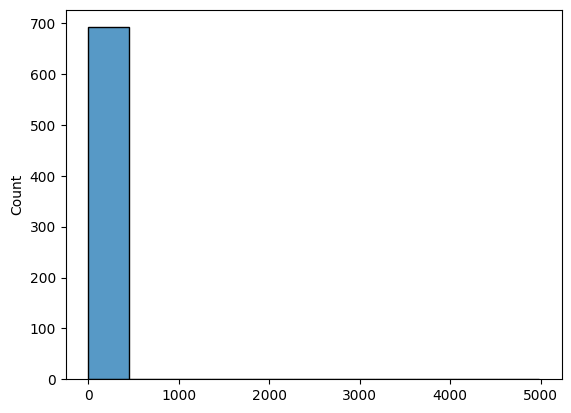

In [14]:
sns.histplot(X.max())

In [5]:
train = pd.read_csv('../raw_data/train.csv')

In [6]:
train

,Unnamed: 0,FlightDate,Year,Quarter,Month,DayofMonth,DayOfWeek,Airline,Operating_Airline,Marketing_Airline_Network,...,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,CRSArrTime,Distance,ArrDelayMinutes,Cancelled,Diverted
0,4324343,2018-07-20,2018,3,7,20,5,Southwest Airlines Co.,WN,WN,...,"Las Vegas, NV",Nevada,11259,"Dallas, TX",Texas,1640,1067.0,0.0,False,False
1,28169346,2022-01-02,2022,1,1,2,7,Spirit Air Lines,NK,NK,...,"Tampa, FL",Florida,13495,"New Orleans, LA",Louisiana,2148,488.0,2.0,False,False
2,18078508,2020-02-11,2020,1,2,11,2,Air Wisconsin Airlines Corp,ZW,UA,...,"Chicago, IL",Illinois,13931,"Norfolk, VA",Virginia,1245,717.0,0.0,False,False
3,23669089,2021-02-10,2021,1,2,10,3,United Air Lines Inc.,UA,UA,...,"Tampa, FL",Florida,12266,"Houston, TX",Texas,828,787.0,0.0,False,False
4,14530840,2020-03-12,2020,1,3,12,4,JetBlue Airways,B6,B6,...,"Washington, DC",Virginia,10721,"Boston, MA",Massachusetts,1455,399.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20435642,491263,2018-10-14,2018,4,10,14,7,Southwest Airlines Co.,WN,WN,...,"Oakland, CA",California,10423,"Austin, TX",Texas,1310,1497.0,0.0,False,False
20435643,12325960,2019-03-30,2019,1,3,30,6,Southwest Airlines Co.,WN,WN,...,"St. Louis, MO",Missouri,11259,"Dallas, TX",Texas,1825,546.0,3.0,False,False
20435644,6762380,2019-02-04,2019,1,2,4,1,American Airlines Inc.,AA,AA,...,"Houston, TX",Texas,11298,"Dallas/Fort Worth, TX",Texas,754,224.0,0.0,False,False
20435645,21463275,2021-09-08,2021,3,9,8,3,Republic Airlines,YX,UA,...,"Washington, DC",Virginia,13303,"Miami, FL",Florida,1325,921.0,0.0,False,False


In [42]:
train.drop(columns = ['Unnamed: 0.1']).to_csv('../raw_data/train.csv', index = False)

In [34]:
comb = pd.read_csv('../raw_data/combined_subset.csv')


,Unnamed: 0,FlightDate,Year,Quarter,Month,DayofMonth,DayOfWeek,Airline,Operating_Airline,Marketing_Airline_Network,...,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,CRSArrTime,Distance,ArrDelayMinutes,Cancelled,Diverted
0,0,2018-01-23,2018,1,1,23,2,Endeavor Air Inc.,9E,DL,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,1304,145.0,0.0,False,False
1,1,2018-01-24,2018,1,1,24,3,Endeavor Air Inc.,9E,DL,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,1304,145.0,0.0,False,False
2,2,2018-01-25,2018,1,1,25,4,Endeavor Air Inc.,9E,DL,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,1304,145.0,0.0,False,False
3,3,2018-01-26,2018,1,1,26,5,Endeavor Air Inc.,9E,DL,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,1304,145.0,0.0,False,False
4,4,2018-01-27,2018,1,1,27,6,Endeavor Air Inc.,9E,DL,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,1500,145.0,0.0,False,False


In [36]:
test_comb = comb.head()
test_comb

,Unnamed: 0,FlightDate,Year,Quarter,Month,DayofMonth,DayOfWeek,Airline,Operating_Airline,Marketing_Airline_Network,...,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,CRSArrTime,Distance,ArrDelayMinutes,Cancelled,Diverted
0,0,2018-01-23,2018,1,1,23,2,Endeavor Air Inc.,9E,DL,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,1304,145.0,0.0,False,False
1,1,2018-01-24,2018,1,1,24,3,Endeavor Air Inc.,9E,DL,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,1304,145.0,0.0,False,False
2,2,2018-01-25,2018,1,1,25,4,Endeavor Air Inc.,9E,DL,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,1304,145.0,0.0,False,False
3,3,2018-01-26,2018,1,1,26,5,Endeavor Air Inc.,9E,DL,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,1304,145.0,0.0,False,False
4,4,2018-01-27,2018,1,1,27,6,Endeavor Air Inc.,9E,DL,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,1500,145.0,0.0,False,False


In [39]:
pd.read_csv('../raw_data/train_100k.csv').drop(columns = ['Unnamed: 0.1']).to_csv('../raw_data/train_100k.csv', index = False)

,Unnamed: 0.1,Unnamed: 0,FlightDate,Year,Quarter,Month,DayofMonth,DayOfWeek,Airline,Operating_Airline,...,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,CRSArrTime,Distance,ArrDelayMinutes,Cancelled,Diverted
0,0,4324343,2018-07-20,2018,3,7,20,5,Southwest Airlines Co.,WN,...,"Las Vegas, NV",Nevada,11259,"Dallas, TX",Texas,1640,1067.0,0.0,False,False
1,1,28169346,2022-01-02,2022,1,1,2,7,Spirit Air Lines,NK,...,"Tampa, FL",Florida,13495,"New Orleans, LA",Louisiana,2148,488.0,2.0,False,False
2,2,18078508,2020-02-11,2020,1,2,11,2,Air Wisconsin Airlines Corp,ZW,...,"Chicago, IL",Illinois,13931,"Norfolk, VA",Virginia,1245,717.0,0.0,False,False
3,3,23669089,2021-02-10,2021,1,2,10,3,United Air Lines Inc.,UA,...,"Tampa, FL",Florida,12266,"Houston, TX",Texas,828,787.0,0.0,False,False
4,4,14530840,2020-03-12,2020,1,3,12,4,JetBlue Airways,B6,...,"Washington, DC",Virginia,10721,"Boston, MA",Massachusetts,1455,399.0,0.0,False,False


In [1]:
from delai.data.big_query import get_bq_chunk

bq_df = get_bq_chunk(table = 'train_100k', index = 0, chunk_size = 1000)

Source data from big query train_100k: 1000 rows (from row 0)

Query delai-368719.delai.train_100k chunk 0 ([0-999])...


In [2]:
bq_df

,Unnamed: 0,FlightDate,Year,Quarter,Month,DayofMonth,DayOfWeek,Airline,Operating_Airline,Marketing_Airline_Network,...,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,CRSArrTime,Distance,ArrDelayMinutes,Cancelled,Diverted
0,13334884,2019-01-24,2019,1,1,24,4,American Airlines Inc.,AA,AA,...,"Atlanta, GA",Georgia,12892,"Los Angeles, CA",California,857,1947.0,0.0,False,False
1,13310345,2019-01-24,2019,1,1,24,4,American Airlines Inc.,AA,AA,...,"Fayetteville, AR",Arkansas,11298,"Dallas/Fort Worth, TX",Texas,1757,280.0,67.0,False,False
2,13503775,2019-01-24,2019,1,1,24,4,Comair Inc.,OH,AA,...,"Charlotte, NC",North Carolina,11193,"Cincinnati, OH",Kentucky,1244,335.0,0.0,False,False
3,13500581,2019-01-24,2019,1,1,24,4,Comair Inc.,OH,AA,...,"Louisville, KY",Kentucky,11057,"Charlotte, NC",North Carolina,1940,335.0,0.0,False,False
4,13325419,2019-01-24,2019,1,1,24,4,American Airlines Inc.,AA,AA,...,"Baltimore, MD",Maryland,13303,"Miami, FL",Florida,750,946.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6436900,2019-02-05,2019,1,2,5,2,Envoy Air,MQ,AA,...,"Roanoke, VA",Virginia,12953,"New York, NY",New York,1547,405.0,0.0,False,False
996,6473297,2019-02-05,2019,1,2,5,2,Republic Airlines,YX,AA,...,"Myrtle Beach, SC",South Carolina,11278,"Washington, DC",Virginia,1334,372.0,0.0,False,False
997,6425131,2019-02-05,2019,1,2,5,2,Envoy Air,MQ,AA,...,"West Palm Beach/Palm Beach, FL",Florida,11278,"Washington, DC",Virginia,1719,857.0,0.0,False,False
998,6762003,2019-02-05,2019,1,2,5,2,American Airlines Inc.,AA,AA,...,"Boston, MA",Massachusetts,12953,"New York, NY",New York,759,184.0,0.0,False,False
